In [ ]:
!pip install tensorflow keras numpy mnist matplotlib

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading the MNIST data from keras.datasets

In [23]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [24]:
type(X_train)

numpy.ndarray

In [26]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [27]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [28]:
print(X_train[10].shape)


(28, 28)


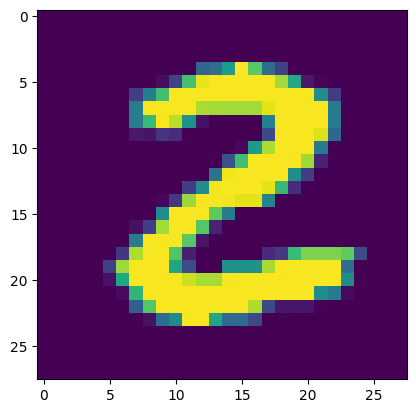

2


In [30]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

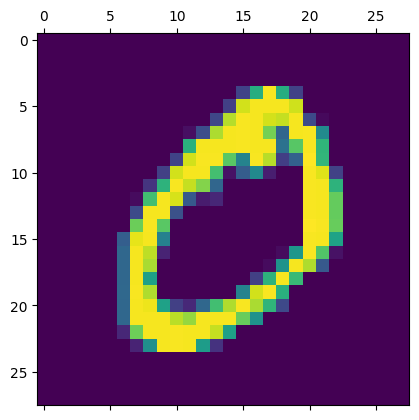

In [34]:
plt.matshow(X_train[1])

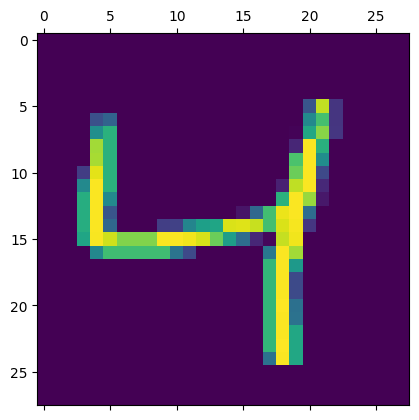

In [35]:
plt.matshow(X_train[2])

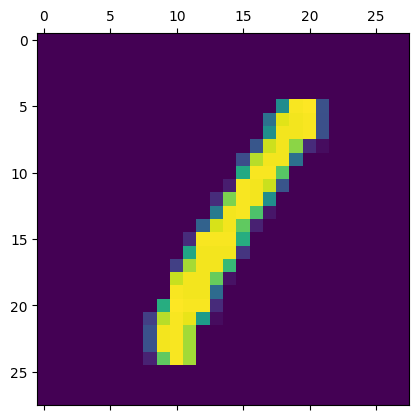

In [36]:
plt.matshow(X_train[3])

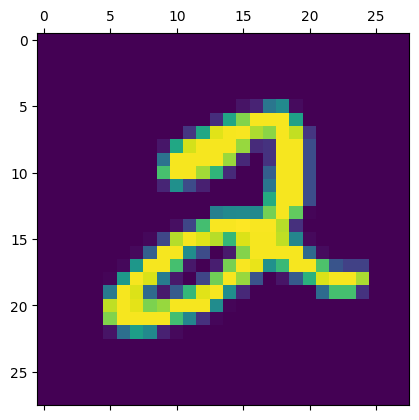

In [38]:
plt.matshow(X_train[5])

In [39]:
Y_train[2]

4

In [40]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [41]:
X_train.shape

(60000, 28, 28)

In [42]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [43]:
X_test_flattened.shape

(10000, 784)

In [44]:
X_test_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Image Lables

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension


In [ ]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [ ]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2999 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1404 - accuracy: 0.9577
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1035 - accuracy: 0.9685
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0836 - accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0686 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0591 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0507 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0444 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0395 - accuracy: 0.9874
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.03

Training data accuracy = 98.9%

Accuracy on Test data:

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1000 - accuracy: 0.9738
0.973800003528595


Test data accuracy = 97.1%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


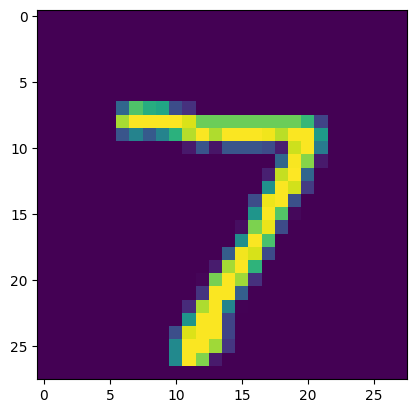

In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred[0])

[4.0913568e-04 2.0833523e-03 4.8580799e-01 8.3375579e-01 1.8618201e-09
 9.4691636e-03 1.2583163e-07 9.9999213e-01 4.8648652e-01 6.2821336e-02]


model.predict()gives the predictions probability of each class for that data point

In [ ]:
#converting the predictions probabilities to class label
label_for_first_test_image=np.argmax(Y_pred[0])
print(label_for_first_test_image)


7


In [ ]:
#converting the prediction probabilities to class label for all test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred)

[[4.0913568e-04 2.0833523e-03 4.8580799e-01 ... 9.9999213e-01
  4.8648652e-01 6.2821336e-02]
 [7.9847487e-05 8.3532071e-01 9.9999988e-01 ... 2.9086883e-07
  2.1529256e-04 2.8467440e-07]
 [6.3825362e-05 9.9987125e-01 1.8636016e-02 ... 1.1414250e-01
  5.1312372e-02 7.7277940e-04]
 ...
 [6.6436284e-10 1.5146140e-05 1.5293458e-07 ... 1.2244256e-01
  3.7216622e-04 9.9997950e-01]
 [2.5608893e-09 1.0622922e-04 5.7934824e-10 ... 2.2789040e-05
  6.1013991e-01 3.3080331e-03]
 [6.9229613e-06 2.8825982e-05 5.8938203e-05 ... 1.7818422e-05
  1.4447275e-02 5.7132796e-09]]


Y_test--->True labels
Y_pred_labels---->predicted labels

confusion matrix

In [ ]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 960    1    3    1    0    7    6    1    1    0]
 [   0 1125    2    2    0    1    2    1    2    0]
 [   1    6 1002    4    4    1    2    7    4    1]
 [   0    0    4  982    1   10    0    5    5    3]
 [   0    1    6    0  947    2    4    2    1   19]
 [   2    0    0    3    2  877    4    0    1    3]
 [   2    3    2    1    2   10  936    0    1    1]
 [   0    5   10    4    3    0    0  994    1   11]
 [   1    1    5    9    6   12    2    3  925   10]
 [   1    3    0    1    4    5    1    3    2  989]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted Labels')

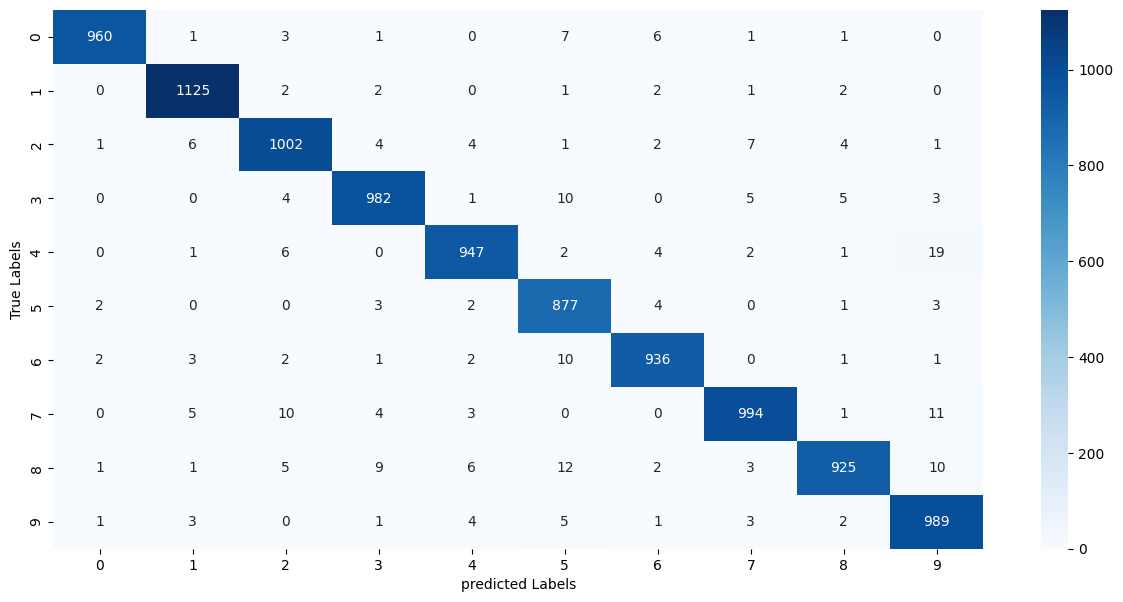

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('predicted Labels')